In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from keys import config

from langchain.llms import Ollama
from langchain_openai import ChatOpenAI
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

In [81]:
#df = pd.read_csv("../data/train.csv")
df = pd.read_csv("../data/JSON.csv")

df.head()

,Unnamed: 0,hots_ip,host_name,name,timestamp,type,host_metric_detail,value
0,0,172.30.5.133,vbogdtlobsvp03,CPU utilization,2024-11-21 20:32:47+00:00,host_metrics,cpu,5.282164
1,1,172.30.5.201,vbogevokeml01,CPU utilization,2024-11-21 20:32:49+00:00,host_metrics,cpu,10.214254
2,2,172.30.5.131,vbogdtlobsvp01,Memory utilization,2024-11-21 20:32:50+00:00,host_metrics,memory,29.665005
3,3,172.30.5.200,vbogmosbkp01,Memory utilization,2024-11-21 20:32:48+00:00,host_metrics,memory,28.104885
4,4,172.30.5.240,vbogevokemp02,Memory utilization,2024-11-21 20:32:49+00:00,host_metrics,memory,33.450832


In [65]:
LLM_Llama  = Ollama(model="llama3.2:1b")
LLM_OpenAI = ChatOpenAI(model="gpt-3.5-turbo", temperature=0, max_tokens=None, timeout=None, max_retries=2, api_key=config.api_key)


In [79]:
agent = create_pandas_dataframe_agent(llm=LLM_OpenAI, df=df, verbose=True, allow_dangerous_code=True)



> Entering new AgentExecutor chain...
Thought: To draw a bar graph of the 5 people with the highest age, we need to first sort the dataframe by age and then select the top 5 entries.
Action: python_repl_ast
Action Input: df_sorted = df.sort_values(by='Age', ascending=False).head(5)Now we have the top 5 entries sorted by age.
Action: python_repl_ast
Action Input: df_sorted.plot(kind='bar', x='Name', y='Age')Axes(0.125,0.11;0.775x0.77)The bar graph has been successfully plotted.
Final Answer: The bar graph of the 5 people with the highest age has been plotted.

> Finished chain.


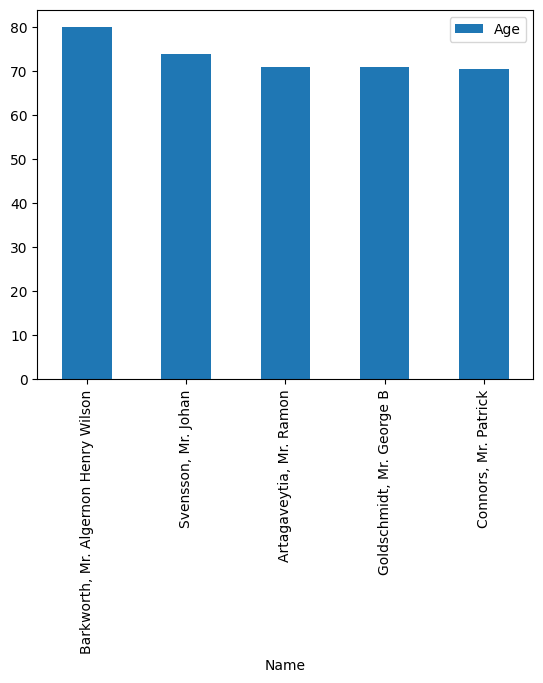

In [80]:
question = "¿Dibuja un gráfico de barras con las 5 personas con mayor edad?"

try: 
    respuesta = agent.invoke(question)
except:
    response="De acuerdo a mi conocimiento actual, no tengo la capacidad para responder a tu pregunta, por favor reformula tu pregunta."



In [78]:
respuesta['output']

'The bar graph of the 5 people with the highest age has been plotted.'